<a href="https://colab.research.google.com/github/MuhammadBilall/Lab01/blob/master/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)
print(data.shape)

def boostrap_mean(sample, sample_size, n_iterations, ci):
  new_array = np.random.choice(sample, (n_iterations, sample_size), replace = True)
  print(new_array.shape,new_array)
  data_mean = np.mean(new_array)
  
  mean_array = np.array(new_array.mean(axis=1))
  #print(mean_array)
  x = 100-ci
  lower = np.percentile(mean_array, x/2)
  upper = np.percentile(mean_array, ci+(x/2))
  #print(lower, upper)

  return data_mean, lower, upper


[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]
(14,)


In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

Histogram for current fleet
Histogram for Proposed Fleet


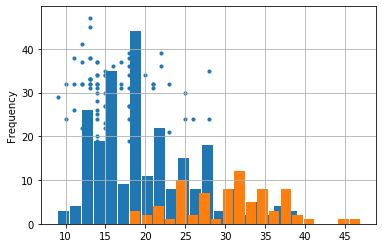

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data = df.values
#print(data)

print("Histogram for current fleet")
commutes = pd.Series(data.T[0])
commutes.plot.hist(grid = True, bins = 20, rwidth = 0.9)

print("Histogram for Proposed Fleet")
x = data.T[1][~np.isnan(data.T[1])]
commutes1 = pd.Series(x)
commutes1.plot.hist(grid = True, bins = 20, rwidth = 0.9)

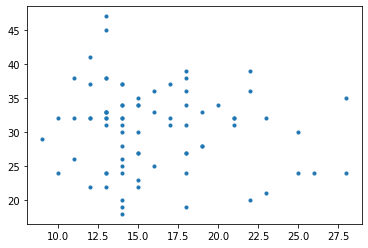

In [120]:
x = data.T[0]
y = data.T[1]

import matplotlib.pyplot as plt1
plt1.scatter(x,y, s=np.pi*3)

Mean of current fleet: 20.14457831325301
Mean of proposed fleet: 30.481012658227847
Bootstrap for current fleet with 95 CI
(100, 249) [[18. 28. 39. ... 16. 19. 14.]
 [16. 15. 18. ... 38. 16. 15.]
 [21. 18. 31. ... 17. 19. 14.]
 ...
 [19. 17. 22. ... 13. 21. 18.]
 [27. 19. 10. ... 21. 17. 12.]
 [29. 16. 13. ... 19. 16. 22.]]
(1100, 249) [[32. 32. 17. ... 18. 27. 18.]
 [14. 18. 21. ... 26. 29. 22.]
 [14. 17. 14. ... 27. 15. 12.]
 ...
 [19. 17. 15. ... 34. 18. 17.]
 [19. 15. 14. ... 21. 25. 19.]
 [22. 21. 23. ... 21. 27. 16.]]
(2100, 249) [[16. 22. 25. ... 21. 15. 15.]
 [22. 13. 36. ... 16. 16. 16.]
 [20. 38. 13. ... 24. 17. 21.]
 ...
 [32. 26. 17. ... 26. 16. 13.]
 [18. 28. 14. ... 24. 15. 14.]
 [30. 19. 17. ...  9. 25. 15.]]
(3100, 249) [[22. 26. 13. ... 22. 19. 13.]
 [36. 15. 11. ... 15. 38. 20.]
 [19. 29. 27. ... 26. 22. 29.]
 ...
 [18. 27. 30. ... 19. 13. 15.]
 [16. 14. 13. ... 23. 36. 15.]
 [23. 14. 17. ... 13. 19. 20.]]
(4100, 249) [[26. 17. 15. ... 15. 15. 10.]
 [16. 15. 16. ... 1

(0, 100000)

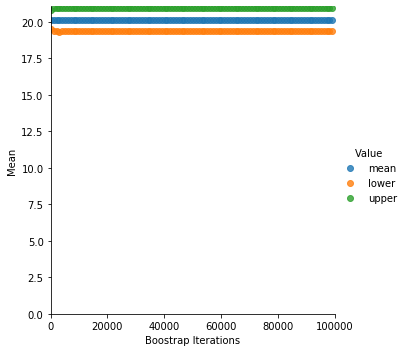

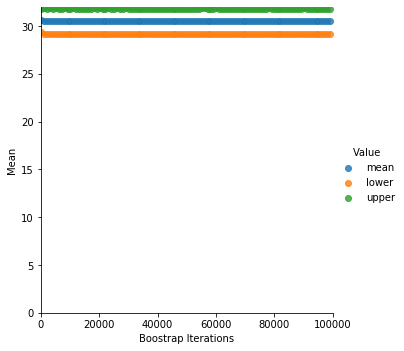

In [117]:
print("Mean of current fleet:", np.mean(data.T[0]))
x = data.T[1][~np.isnan(data.T[1])]
print("Mean of proposed fleet:", np.mean(x))

print ("Bootstrap for current fleet with 95 CI")
currentFleet = data.T[0]
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(currentFleet, currentFleet.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

print ("Bootstrap for proposed fleet with 95 CI")
proposedFleet = x
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(proposedFleet, proposedFleet.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)
